In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, '../')

from pharynx_analysis import experiment
from pharynx_analysis import pharynx_io as pio
from pharynx_analysis import image_processing
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from skimage import measure, transform
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd
import pickle

In [27]:
# pe = pickle.load(open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'rb'))
# pe.raw_image_data.strain.size
img_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/2017_02_22-HD233_SAY47.tif"
strain_map_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/indexer.csv"

strains = pio.load_strain_map(strain_map_path)
pe = experiment.PairExperiment(img_path, "TL/470_1/410_1/470_2/410_2", strains, midline_smoothing=1e8)
# pickle.dump(pe, open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'wb'))

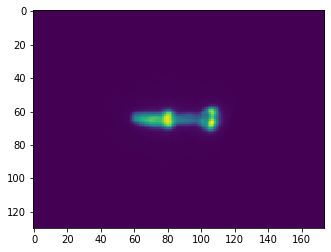

In [31]:
r = pe.rot_ratios.isel(pair=0)[i]
fl = pe.rot_fl.sel(wavelength='410_1')[i]
plt.imshow(r * fl)

In [ ]:
j=0

I410 = pe.rot_fl.sel(wavelength='410_1')
I470 = pe.rot_fl.sel(wavelength='470_1')

ys = np.arange(I[j].shape[0])

locs410 = []
locs470 = []
for i in range(I.shape[1]):
    locs410.append(np.average(ys, weights=I410[j,:,i].data))
    locs470.append(np.average(ys, weights=I470[j,:,i].data))
    

plt.figure(figsize=(20,10))
plt.imshow(I410[j]/I470[j]);
plt.scatter(x=np.arange(len(locs)), y=locs410, color='red');
plt.scatter(x=np.arange(len(locs)), y=locs470, color='orange');
plt.ylim((50,80));
plt.xlim((50,130))
xs = np.linspace(50,120)
plt.plot(xs, pe.midlines['410_1'][j](xs), color='red', zorder=2);
plt.plot(xs, pe.midlines['470_1'][j](xs), color='orange', zorder=2)